In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot
import re
%matplotlib inline

In [102]:
#dataset path 1

path = r"C:\Users\ishak\Main\Desktop\Code\Github\Machine_Learning_IBM_Professional_Certificate\London_and_Greater_London_Housing_Project\CAverage-prices-Property-Type-2022-04.csv"

#read dataset

df_prices = pd.read_csv(path, parse_dates = ['Date'], index_col = ['Date', 'Region_Name'])

#take a brief look at the data
df_prices.tail(10)

Area_Code  Detached_Average_Price  \
Date       Region_Name                                               
2022-01-04 Richmond upon Thames  E09000027            1.759969e+06   
           Southwark             E09000028            1.831870e+06   
           Sutton                E09000029            1.019323e+06   
           Tower Hamlets         E09000030                     NaN   
           Waltham Forest        E09000031            8.859137e+05   
           Wandsworth            E09000032            1.951583e+06   
           City of Westminster   E09000033            3.033633e+06   
           Havering              E09000016            8.332595e+05   
           Hillingdon            E09000017            9.169333e+05   
           Hounslow              E09000018            8.570080e+05   

                                 Detached_Index  Detached_Monthly_Change  \
Date       Region_Name                                                     
2022-01-04 Richmond upon Thames      143.480179                 3.694882   
           Southwark                 129.035570                 0.983815   
           Sutton                    146.672206                -0.109786   
           Tower Hamlets                    NaN                      NaN   
           Waltham Forest            152.423759                -2.935612   
           Wandsworth                128.951997                 1.911939   
           City of Westminster       113.195265                 0.372350   
           Havering                  158.591441                 3.489519   
           Hillingdon                145.045237                 1.345044   
           Hounslow                  136.250627                 0.346304   

                                 Detached_Annual_Change  \
Date       Region_Name                                    
2022-01-04 Richmond upon Thames               20.389525   
           Southwark                           7.845293   
           Sutton                             11.405883   
           Tower Hamlets                            NaN   
           Waltham Forest                      3.067952   
           Wandsworth                         13.821126   
           City of Westminster                11.215395   
           Havering                           12.676428   
           Hillingdon                         10.000911   
           Hounslow                            2.470623   

                                 Semi_Detached_Average_Price  \
Date       Region_Name                                         
2022-01-04 Richmond upon Thames                 1.153919e+06   
           Southwark                            1.070575e+06   
           Sutton                               6.152142e+05   
           Tower Hamlets                        7.766168e+05   
           Waltham Forest                       7.462876e+05   
           Wandsworth                           1.311056e+06   
           City of Westminster                  2.582366e+06   
           Havering                             5.205951e+05   
           Hillingdon                           5.785605e+05   
           Hounslow                             6.078301e+05   

                                 Semi_Detached_Index  \
Date       Region_Name                                 
2022-01-04 Richmond upon Thames           140.991400   
           Southwark                      127.259597   
           Sutton                         145.604149   
           Tower Hamlets                  129.003496   
           Waltham Forest                 150.185875   
           Wandsworth                     125.417336   
           City of Westminster            107.740609   
           Havering                       158.120939   
           Hillingdon                     145.108780   
           Hounslow                       135.205303   

                                 Semi_Detached_Monthly_Change  \
Date       Region_Name                                         

# EDA + Feature Engineering + Data Cleaning

In [103]:
#Number of rows and columns
print("Data dimensions are: {}".format(df_prices.shape))

print('----------------------------------------')

#list of columns

print(df_prices.columns.tolist())

print('----------------------------------------')

#types of each feature

print(df_prices.dtypes)

Data dimensions are: (10112, 17)
----------------------------------------
['Area_Code', 'Detached_Average_Price', 'Detached_Index', 'Detached_Monthly_Change', 'Detached_Annual_Change', 'Semi_Detached_Average_Price', 'Semi_Detached_Index', 'Semi_Detached_Monthly_Change', 'Semi_Detached_Annual_Change', 'Terraced_Average_Price', 'Terraced_Index', 'Terraced_Monthly_Change', 'Terraced_Annual_Change', 'Flat_Average_Price', 'Flat_Index', 'Flat_Monthly_Change', 'Flat_Annual_Change']
----------------------------------------
Area_Code                        object
Detached_Average_Price          float64
Detached_Index                  float64
Detached_Monthly_Change         float64
Detached_Annual_Change          float64
Semi_Detached_Average_Price     float64
Semi_Detached_Index             float64
Semi_Detached_Monthly_Change    float64
Semi_Detached_Annual_Change     float64
Terraced_Average_Price          float64
Terraced_Index                  float64
Terraced_Monthly_Change         float64

In [104]:
#the entire date is useful to analyse the data, and so no date splitting is needed
#check for any null values
df_prices.isnull().sum()

Area_Code                        0
Detached_Average_Price          12
Detached_Index                  12
Detached_Monthly_Change         12
Detached_Annual_Change          12
Semi_Detached_Average_Price      0
Semi_Detached_Index              0
Semi_Detached_Monthly_Change     0
Semi_Detached_Annual_Change      0
Terraced_Average_Price           0
Terraced_Index                   0
Terraced_Monthly_Change          0
Terraced_Annual_Change           0
Flat_Average_Price               0
Flat_Index                       0
Flat_Monthly_Change              0
Flat_Annual_Change               0
dtype: int64

In [105]:
#imputing missing values using the mean
avg_detached_price = df_prices['Detached_Average_Price'].astype("float").mean(axis=0)
df_prices['Detached_Average_Price'].replace(np.nan, avg_detached_price, inplace=True)

avg_detached_price = df_prices['Detached_Index'].astype("float").mean(axis=0)
df_prices['Detached_Index'].replace(np.nan, avg_detached_price, inplace=True)

avg_detached_price = df_prices['Detached_Monthly_Change'].astype("float").mean(axis=0)
df_prices['Detached_Monthly_Change'].replace(np.nan, avg_detached_price, inplace=True)

avg_detached_price = df_prices['Detached_Annual_Change'].astype("float").mean(axis=0)
df_prices['Detached_Annual_Change'].replace(np.nan, avg_detached_price, inplace=True)

df_prices.isnull().sum()

Area_Code                       0
Detached_Average_Price          0
Detached_Index                  0
Detached_Monthly_Change         0
Detached_Annual_Change          0
Semi_Detached_Average_Price     0
Semi_Detached_Index             0
Semi_Detached_Monthly_Change    0
Semi_Detached_Annual_Change     0
Terraced_Average_Price          0
Terraced_Index                  0
Terraced_Monthly_Change         0
Terraced_Annual_Change          0
Flat_Average_Price              0
Flat_Index                      0
Flat_Monthly_Change             0
Flat_Annual_Change              0
dtype: int64

In [106]:
df_prices.describe()

,Detached_Average_Price,Detached_Index,Detached_Monthly_Change,Detached_Annual_Change,Semi_Detached_Average_Price,Semi_Detached_Index,Semi_Detached_Monthly_Change,Semi_Detached_Annual_Change,Terraced_Average_Price,Terraced_Index,Terraced_Monthly_Change,Terraced_Annual_Change,Flat_Average_Price,Flat_Index,Flat_Monthly_Change,Flat_Annual_Change
count,1.011200e+04,10112.000000,10112.000000,10112.000000,1.011200e+04,10112.000000,10112.000000,10112.000000,1.011200e+04,10112.000000,10112.000000,10112.000000,1.011200e+04,10112.000000,10112.000000,10112.000000
mean,7.353440e+05,72.557507,0.648712,8.058861,5.306931e+05,72.141763,0.656722,8.179859,3.965379e+05,71.520941,0.662675,8.237022,2.676122e+05,73.746610,0.594425,7.465131
std,5.851419e+05,35.026169,1.745592,8.661458,5.089154e+05,35.328936,1.689162,8.531210,3.537454e+05,35.407546,1.677693,8.505126,1.827682e+05,32.924527,1.624958,8.868071
min,9.479697e+04,12.494361,-11.630788,-28.289984,6.375399e+04,12.366640,-11.702908,-26.371441,5.360322e+04,12.349503,-11.965385,-26.294722,4.290967e+04,13.750553,-11.953029,-25.890383
25%,3.604262e+05,43.912562,-0.328766,2.416562,2.539842e+05,42.350708,-0.286257,2.738238,1.931123e+05,40.991715,-0.271417,2.875013,1.528150e+05,46.592345,-0.335380,1.701057
50%,5.688278e+05,68.205022,0.648712,7.456318,3.862427e+05,68.396238,0.675452,7.659201,3.001418e+05,68.367500,0.685825,7.941029,2.250496e+05,73.268548,0.605568,6.834646
75%,8.994997e+05,103.262260,1.649633,13.539029,6.265890e+05,102.307957,1.621652,13.455030,4.700246e+05,102.462302,1.630027,13.495365,3.368898e+05,102.378367,1.547985,13.126185
max,4.400431e+06,167.118259,15.886819,44.011269,4.479643e+06,162.851006,14.640775,43.176951,2.959604e+06,159.741182,13.658179,44.200269,1.290896e+06,149.097033,12.280194,42.103859


In [107]:
category_col = [i for i in df_prices.columns if df_prices[i].dtype == "object"]
category_col

['Area_Code']

In [108]:
df_prices.drop(["Area_Code"], axis=1)

Detached_Average_Price  Detached_Index  \
Date       Region_Name                                                   
1996-01-01 Tower Hamlets                  1.025443e+05       15.985531   
           Sutton                         1.625161e+05       23.384725   
           City of Westminster            3.394801e+05       12.667169   
           Croydon                        1.454944e+05       24.626986   
           Brent                          1.572960e+05       17.393002   
...                                                ...             ...   
2022-01-04 Wandsworth                     1.951583e+06      128.951997   
           City of Westminster            3.033633e+06      113.195265   
           Havering                       8.332595e+05      158.591441   
           Hillingdon                     9.169333e+05      145.045237   
           Hounslow                       8.570080e+05      136.250627   

                                Detached_Monthly_Change  \
Date       Region_Name                                    
1996-01-01 Tower Hamlets                       5.951351   
           Sutton                             -0.311818   
           City of Westminster                -0.644644   
           Croydon                            -0.599804   
           Brent                               0.249644   
...                                                 ...   
2022-01-04 Wandsworth                          1.911939   
           City of Westminster                 0.372350   
           Havering                            3.489519   
           Hillingdon                          1.345044   
           Hounslow                            0.346304   

                                Detached_Annual_Change  \
Date       Region_Name                                   
1996-01-01 Tower Hamlets                      9.640550   
           Sutton                            -3.199982   
           City of Westminster               -2.656578   
           Croydon                           -3.016286   
           Brent                              0.162710   
...                                                ...   
2022-01-04 Wandsworth                        13.821126   
           City of Westminster               11.215395   
           Havering                          12.676428   
           Hillingdon                        10.000911   
           Hounslow                           2.470623   

                                Semi_Detached_Average_Price  \
Date       Region_Name                                        
1996-01-01 Tower Hamlets                       9.509084e+04   
           Sutton                              9.442941e+04   
           City of Westminster                 2.978638e+05   
           Croydon                             8.814104e+04   
           Brent                               9.996919e+04   
...                                                     ...   
2022-01-04 Wandsworth                          1.311056e+06   
           City of Westminster                 2.582366e+06   
           Havering                            5.205951e+05   
           Hillingdon                          5.785605e+05   
           Hounslow                            6.078301e+05   

                                Semi_Detached_Index  \
Date       Region_Name                                
1996-01-01 Tower Hamlets                  15.795502   
           Sutton                         22.348825   
           City of Westminster            12.427374   
           Croydon                        23.279029   
           Brent                          16.834783   
...                                             ...   
2022-01-04 Wandsworth                    125.417336   
           City of Westminster           107.740609   
           Havering                      158.120939   
           Hillingdon                    145.108780   
           Hounslow                      135.205303   

          

In [109]:
category_col = [i for i in df_prices.columns if df_prices[i].dtype == "object"]
category_col

['Area_Code']

In [110]:
df_prices.groupby('Region_Name').mean()

,Detached_Average_Price,Detached_Index,Detached_Monthly_Change,Detached_Annual_Change,Semi_Detached_Average_Price,Semi_Detached_Index,Semi_Detached_Monthly_Change,Semi_Detached_Annual_Change,Terraced_Average_Price,Terraced_Index,Terraced_Monthly_Change,Terraced_Annual_Change,Flat_Average_Price,Flat_Index,Flat_Monthly_Change,Flat_Annual_Change
Region_Name,,,,,,,,,,,,,,,,
Barking and Dagenham,3.168308e+05,81.697587,0.600543,7.598493,2.217247e+05,80.156812,0.614696,7.777883,1.894176e+05,79.803502,0.618591,7.794353,142149.790141,82.610376,0.561721,7.189425
Barnet,7.717130e+05,72.336612,0.625896,7.689169,4.455720e+05,71.852946,0.630351,7.764524,3.338728e+05,71.197925,0.641282,7.874365,255428.510639,73.456990,0.566005,6.997705
Bexley,3.488347e+05,80.586981,0.576361,7.123670,2.592628e+05,79.820102,0.591535,7.326397,2.073548e+05,79.068118,0.597301,7.380316,151080.631923,81.437278,0.529406,6.659210
Brent,6.347498e+05,70.187462,0.676541,8.321208,4.168491e+05,70.197271,0.681654,8.407948,3.536214e+05,69.408429,0.689457,8.462698,244254.535042,71.434308,0.631028,7.766667
Bromley,5.507467e+05,74.882390,0.579262,7.243531,3.293757e+05,74.294916,0.588469,7.372137,2.438938e+05,73.614077,0.595178,7.438176,191582.745039,75.953690,0.524930,6.662985
Camden,1.716573e+06,66.232145,0.720142,8.735265,1.152429e+06,65.632756,0.735149,8.961262,7.678797e+05,64.994038,0.723516,8.822700,465349.219711,66.969812,0.648418,7.947849
City of Westminster,1.610956e+06,60.110290,0.730598,8.995681,1.422938e+06,59.367342,0.721482,8.882515,9.493833e+05,59.388363,0.717117,8.816005,562033.849773,61.107663,0.656112,8.133896
Croydon,4.728668e+05,80.039411,0.584625,7.280420,2.998731e+05,79.199818,0.598955,7.482806,2.191411e+05,78.526046,0.605084,7.543721,174747.278686,81.432345,0.531983,6.727022
Ealing,6.804880e+05,73.125070,0.617671,7.709202,4.095656e+05,72.797647,0.624220,7.807945,3.353468e+05,71.907954,0.639280,7.969691,248028.465996,74.297907,0.569810,7.139953


array([[<AxesSubplot:title={'center':'Detached_Average_Price'}>,
        <AxesSubplot:title={'center':'Detached_Index'}>,
        <AxesSubplot:title={'center':'Detached_Monthly_Change'}>,
        <AxesSubplot:title={'center':'Detached_Annual_Change'}>],
       [<AxesSubplot:title={'center':'Semi_Detached_Average_Price'}>,
        <AxesSubplot:title={'center':'Semi_Detached_Index'}>,
        <AxesSubplot:title={'center':'Semi_Detached_Monthly_Change'}>,
        <AxesSubplot:title={'center':'Semi_Detached_Annual_Change'}>],
       [<AxesSubplot:title={'center':'Terraced_Average_Price'}>,
        <AxesSubplot:title={'center':'Terraced_Index'}>,
        <AxesSubplot:title={'center':'Terraced_Monthly_Change'}>,
        <AxesSubplot:title={'center':'Terraced_Annual_Change'}>],
       [<AxesSubplot:title={'center':'Flat_Average_Price'}>,
        <AxesSubplot:title={'center':'Flat_Index'}>,
        <AxesSubplot:title={'center':'Flat_Monthly_Change'}>,
        <AxesSubplot:title={'center':'Flat

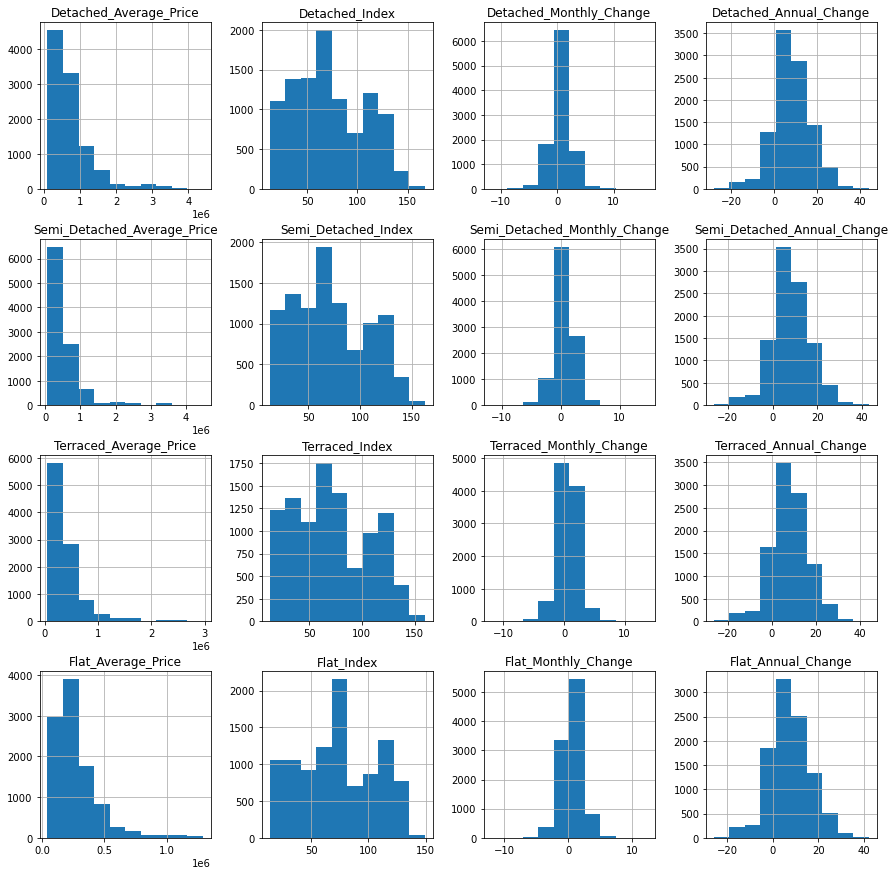

In [111]:
df_prices.hist(figsize=(15,15))

<Figure size 540x360 with 0 Axes>

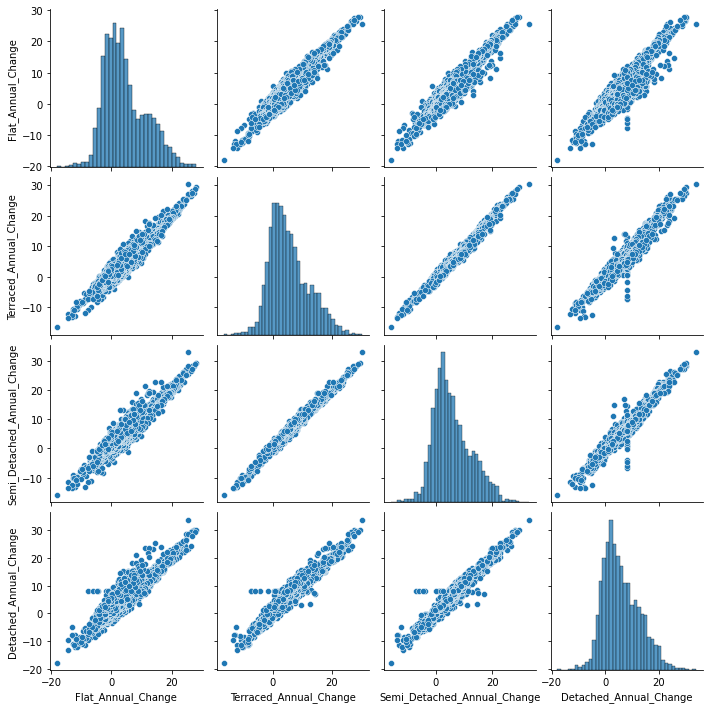

In [112]:
#How does the value of different housing change each year?

matplotlib.pyplot.figure(dpi=90)
sns.pairplot(data=df_prices[['Flat_Annual_Change','Terraced_Annual_Change','Semi_Detached_Annual_Change','Detached_Annual_Change']].tail(3000))

<Figure size 45000x45000 with 0 Axes>

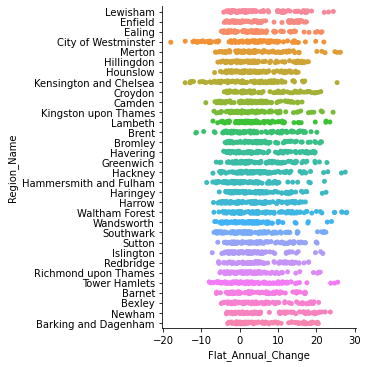

In [130]:
#Looking at Flats
ploty = df_prices.reset_index()
matplotlib.pyplot.figure(figsize=(50,50),dpi=900)
sns.catplot(x = 'Flat_Annual_Change', y = 'Region_Name', data = ploty.tail(3000))

In [119]:
df_prices.iloc[2]

Area_Code                        E09000033
Detached_Average_Price              339480
Detached_Index                     12.6672
Detached_Monthly_Change          -0.644644
Detached_Annual_Change            -2.65658
Semi_Detached_Average_Price         297864
Semi_Detached_Index                12.4274
Semi_Detached_Monthly_Change    0.00587006
Semi_Detached_Annual_Change      -0.423709
Terraced_Average_Price              198671
Terraced_Index                     12.4278
Terraced_Monthly_Change           0.489238
Terraced_Annual_Change           -0.160893
Flat_Average_Price                  127530
Flat_Index                         13.8658
Flat_Monthly_Change               0.332165
Flat_Annual_Change                 0.73355
Name: (1996-01-01 00:00:00, City of Westminster), dtype: object

In [131]:
df_prices

Area_Code  Detached_Average_Price  \
Date       Region_Name                                              
1996-01-01 Tower Hamlets        E09000030            1.025443e+05   
           Sutton               E09000029            1.625161e+05   
           City of Westminster  E09000033            3.394801e+05   
           Croydon              E09000008            1.454944e+05   
           Brent                E09000005            1.572960e+05   
...                                   ...                     ...   
2022-01-04 Wandsworth           E09000032            1.951583e+06   
           City of Westminster  E09000033            3.033633e+06   
           Havering             E09000016            8.332595e+05   
           Hillingdon           E09000017            9.169333e+05   
           Hounslow             E09000018            8.570080e+05   

                                Detached_Index  Detached_Monthly_Change  \
Date       Region_Name                                                    
1996-01-01 Tower Hamlets             15.985531                 5.951351   
           Sutton                    23.384725                -0.311818   
           City of Westminster       12.667169                -0.644644   
           Croydon                   24.626986                -0.599804   
           Brent                     17.393002                 0.249644   
...                                        ...                      ...   
2022-01-04 Wandsworth               128.951997                 1.911939   
           City of Westminster      113.195265                 0.372350   
           Havering                 158.591441                 3.489519   
           Hillingdon               145.045237                 1.345044   
           Hounslow                 136.250627                 0.346304   

                                Detached_Annual_Change  \
Date       Region_Name                                   
1996-01-01 Tower Hamlets                      9.640550   
           Sutton                            -3.199982   
           City of Westminster               -2.656578   
           Croydon                           -3.016286   
           Brent                              0.162710   
...                                                ...   
2022-01-04 Wandsworth                        13.821126   
           City of Westminster               11.215395   
           Havering                          12.676428   
           Hillingdon                        10.000911   
           Hounslow                           2.470623   

                                Semi_Detached_Average_Price  \
Date       Region_Name                                        
1996-01-01 Tower Hamlets                       9.509084e+04   
           Sutton                              9.442941e+04   
           City of Westminster                 2.978638e+05   
           Croydon                             8.814104e+04   
           Brent                               9.996919e+04   
...                                                     ...   
2022-01-04 Wandsworth                          1.311056e+06   
           City of Westminster                 2.582366e+06   
           Havering                            5.205951e+05   
           Hillingdon                          5.785605e+05   
           Hounslow                            6.078301e+05   

                                Semi_Detached_Index  \
Date       Region_Name                                
1996-01-01 Tower Hamlets                  15.795502   
           Sutton                         22.348825   
           City of Westminster            12.427374   
           Croydon                        23.279029   
           Brent                          16.834783   
...                                             ...   
2022-01-04 Wandsworth                    125.417336   
           City of Westminster           107.740609   
           Havering              

In [90]:
#Looking for flats below £250,000
#verages_flat = [avgpriceArea1(i, 250000) for i in df_prices['Region_Name'].unique()]
Areaunique = df_prices['Region_Name'].unique().tolist()
#Averages_flat = avgpriceArea1(df_prices['Region_Name'].unique().tolist(),250000)
#print(Areaunique[1])
#print(df_prices.iloc[1]['Region_Name'])
#print(avgpriceArea1(Areaunique, 250000))

<AxesSubplot:>

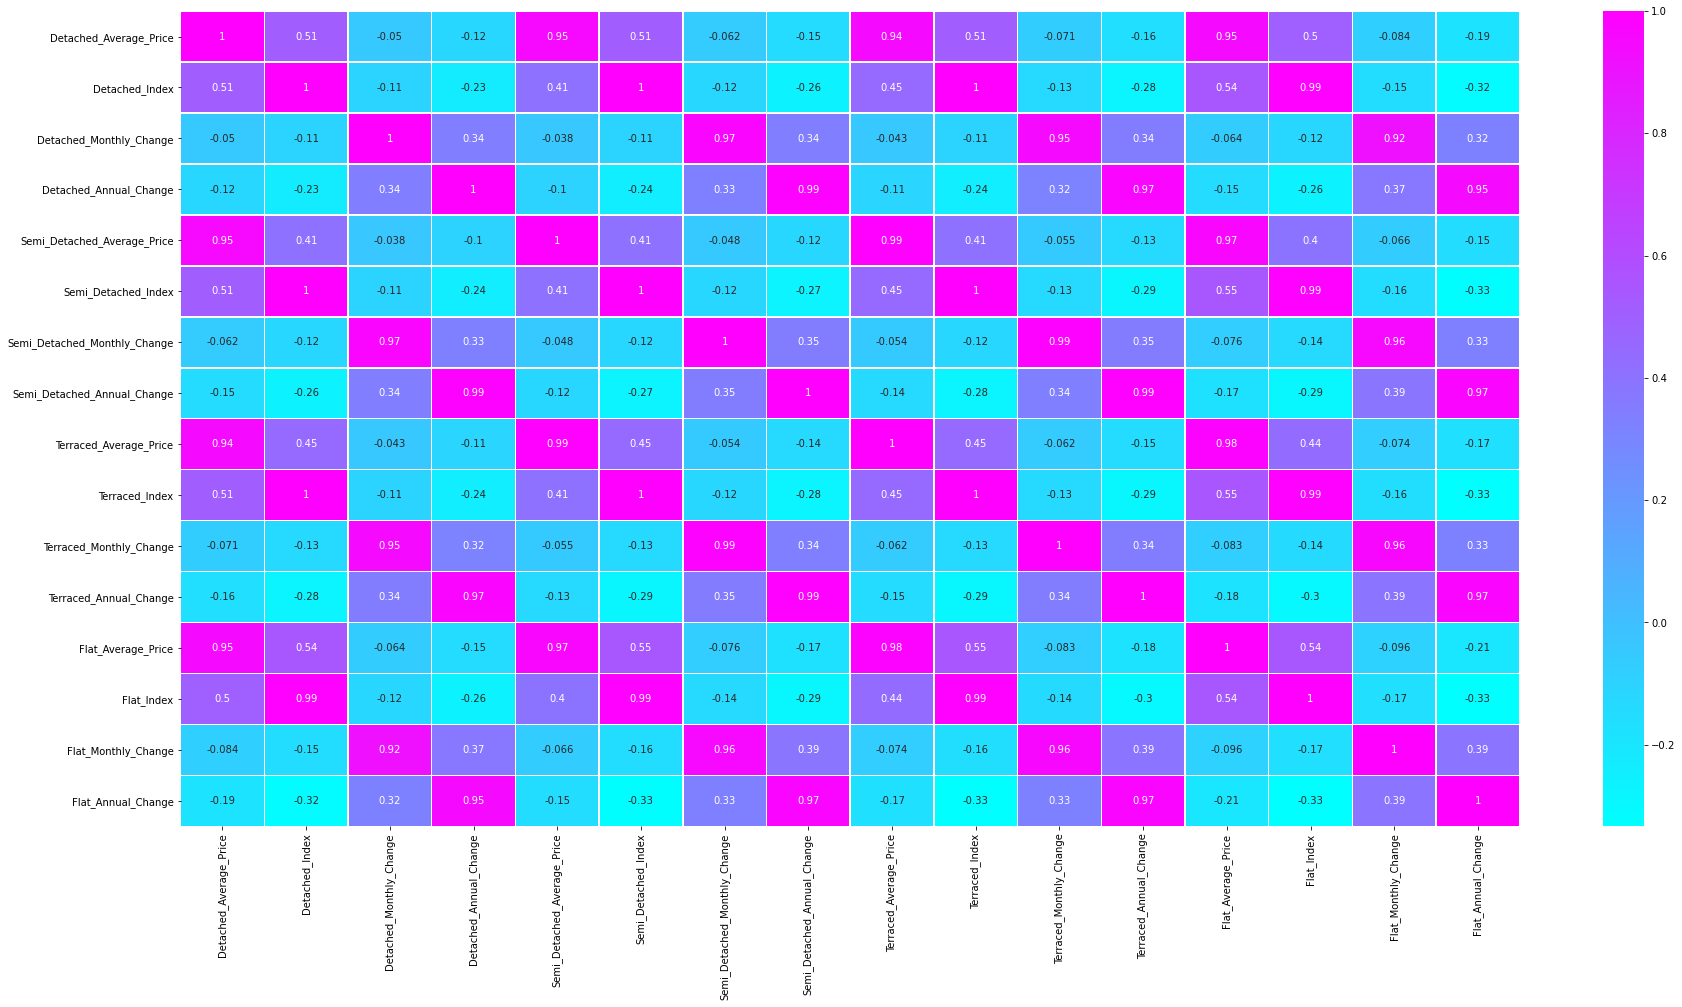

In [91]:
matplotlib.pyplot.figure(figsize = (30, 15))
sns.heatmap(df_prices.corr(), annot = True, linewidths=.5, cmap = matplotlib.pyplot.cm.cool)

# Deep Learning to Predict Flat Prices

In [132]:
features = df_prices.columns.tolist()
features.remove('Area_Code')
features.remove('Flat_Average_Price')
X = df_prices[features]
y = df_prices['Flat_Average_Price']

In [133]:
Features = X.values
Prediction = y.values

#splitting Train and Test 
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [134]:
from sklearn.model_selection import train_test_split
Features_train, Features_test, Prediction_train, Prediction_test = train_test_split(Features, Prediction, test_size=0.33, random_state=101)

In [135]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
Features_train = s_scaler.fit_transform(Features_train.astype(np.float))
Features_test = s_scaler.transform(Features_test.astype(np.float))

<ipython-input-135-79aa6afdbbe4>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Features_train = s_scaler.fit_transform(Features_train.astype(np.float))
<ipython-input-135-79aa6afdbbe4>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Features_test = s_scaler.transform(Features_test.astype(np.float))


# Multiple Linear Regressions

In [136]:
# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(Features_train, Prediction_train)

LinearRegression()

In [137]:
#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)

268063.690619607
[  44211.48928236    1609.8369818    -1900.08591847    2878.7473865
 -102998.83932472  -78398.72808234    4537.40160405  -12940.76574967
  234170.76907354   11249.09804471   -3585.80657022    5693.07754209
   80391.83146438     699.53696609    4620.06207303]


In [138]:
Pred = regressor.predict(Features_test) #y_pred

In [139]:
#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) 
coeff_df

,Coefficient
Detached_Average_Price,44211.489282
Detached_Index,1609.836982
Detached_Monthly_Change,-1900.085918
Detached_Annual_Change,2878.747386
Semi_Detached_Average_Price,-102998.839325
Semi_Detached_Index,-78398.728082
Semi_Detached_Monthly_Change,4537.401604
Semi_Detached_Annual_Change,-12940.765750
Terraced_Average_Price,234170.769074
Terraced_Index,11249.098045


C:\Users\ishak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

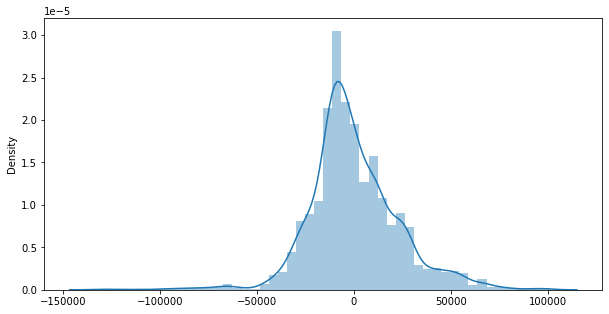

In [199]:
# visualising residuals
fig = matplotlib.pyplot.figure(figsize=(10,5))
residuals = (Prediction_test - Pred)
sns.distplot(residuals)

In [143]:
#Comparing actual and predicted
Pred = regressor.predict(Features_test)
df = pd.DataFrame({'Actual': Prediction_test, 'Predicted': Pred})
df1 = df.head(10)
df1

,Actual,Predicted
0,236351.25310,246266.233130
1,417375.70450,364076.058322
2,90353.17293,94098.857598
3,402023.98950,389320.727707
4,82685.17992,83525.357406
5,397245.37480,405543.274206
6,210908.89660,214997.615306
7,132263.18200,119433.328890
8,246744.27870,244503.458548
9,339879.76040,328169.322238


In [145]:
# evaluate the performance
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Prediction_test, Pred))  
print('MSE:', metrics.mean_squared_error(Prediction_test, Pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(Prediction_test, Pred)))
print('VarScore:',metrics.explained_variance_score(Prediction_test, Pred)) #Basically the accuracy score

MAE: 17043.409071603353
MSE: 542875309.1180027
RMSE: 23299.68474288875
VarScore: 0.983760378995154


# Keras Regression

In [191]:
# Creating a Neural Network
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [192]:
# having 17 neuron is based on the number of available features
model = Sequential()
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [193]:
plotm = ploty.columns.tolist()
plotm.remove('Area_Code')
plotm.remove('Flat_Average_Price')
plotm.remove('Date')
A = ploty[plotm].values
b = ploty['Flat_Average_Price'].values
#tens1 = tf.convert_to_tensor(A)
#tens2 = tf.convert_to_tensor(b)
#ploty[plotm]
#tens1_train, tens1_test, tens2_train, tens2_test = train_test_split(tens1, tens2, test_size=0.33, random_state=101)
A_train, b_test, A_train, b_test = train_test_split(A, b, test_size=0.33, random_state=101)

In [194]:
model.fit(x=Features_train,y=Prediction_train,
          validation_data=(Features_test,Prediction_test),
          batch_size=128,epochs=400)
model.summary()

Epoch 1/400
 7/53 [==>...........................] - ETA: 0s - loss: 109308919808.0000

C:\Users\ishak\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


53/53 [==============================] - 1s 13ms/step - loss: 105243435008.0000 - val_loss: 104550670336.0000
Epoch 2/400
53/53 [==============================] - 1s 12ms/step - loss: 105227141120.0000 - val_loss: 104506703872.0000
Epoch 3/400
53/53 [==============================] - 1s 12ms/step - loss: 105072779264.0000 - val_loss: 104143945728.0000
Epoch 4/400
53/53 [==============================] - 1s 12ms/step - loss: 104158289920.0000 - val_loss: 102370689024.0000
Epoch 5/400
53/53 [==============================] - 1s 11ms/step - loss: 100649500672.0000 - val_loss: 96602120192.0000
Epoch 6/400
53/53 [==============================] - 1s 11ms/step - loss: 91219976192.0000 - val_loss: 83163930624.0000
Epoch 7/400
53/53 [==============================] - 1s 11ms/step - loss: 72908079104.0000 - val_loss: 60562657280.0000
Epoch 8/400
53/53 [==============================] - 1s 12ms/step - loss: 48137711616.0000 - val_loss: 36188061696.0000
Epoch 9/400
53/53 [========================

Epoch 70/400
53/53 [==============================] - 1s 13ms/step - loss: 827296448.0000 - val_loss: 804593280.0000
Epoch 71/400
53/53 [==============================] - 1s 12ms/step - loss: 820914048.0000 - val_loss: 801842496.0000
Epoch 72/400
53/53 [==============================] - 1s 12ms/step - loss: 814408576.0000 - val_loss: 791969792.0000
Epoch 73/400
53/53 [==============================] - 1s 12ms/step - loss: 806791168.0000 - val_loss: 790005632.0000
Epoch 74/400
53/53 [==============================] - 1s 12ms/step - loss: 803184832.0000 - val_loss: 780983616.0000
Epoch 75/400
53/53 [==============================] - 1s 12ms/step - loss: 798909824.0000 - val_loss: 773776192.0000
Epoch 76/400
53/53 [==============================] - 1s 12ms/step - loss: 794694528.0000 - val_loss: 776348352.0000
Epoch 77/400
53/53 [==============================] - 1s 12ms/step - loss: 792447168.0000 - val_loss: 768333632.0000
Epoch 78/400
53/53 [==============================] - 1s 12ms/st

53/53 [==============================] - 1s 11ms/step - loss: 420241312.0000 - val_loss: 430153632.0000
Epoch 140/400
53/53 [==============================] - 1s 11ms/step - loss: 417733376.0000 - val_loss: 422219648.0000
Epoch 141/400
53/53 [==============================] - 1s 11ms/step - loss: 417094112.0000 - val_loss: 425462496.0000
Epoch 142/400
53/53 [==============================] - 1s 11ms/step - loss: 411946016.0000 - val_loss: 415719456.0000
Epoch 143/400
53/53 [==============================] - 1s 12ms/step - loss: 407016096.0000 - val_loss: 410824960.0000
Epoch 144/400
53/53 [==============================] - 1s 12ms/step - loss: 404265024.0000 - val_loss: 410115360.0000
Epoch 145/400
53/53 [==============================] - 1s 12ms/step - loss: 400829824.0000 - val_loss: 408159072.0000
Epoch 146/400
53/53 [==============================] - 1s 12ms/step - loss: 396914336.0000 - val_loss: 407868992.0000
Epoch 147/400
53/53 [==============================] - 1s 12ms/step - 

53/53 [==============================] - 1s 12ms/step - loss: 310810080.0000 - val_loss: 320850112.0000
Epoch 209/400
53/53 [==============================] - 1s 12ms/step - loss: 307908480.0000 - val_loss: 321002976.0000
Epoch 210/400
53/53 [==============================] - 1s 12ms/step - loss: 309382592.0000 - val_loss: 319966592.0000
Epoch 211/400
53/53 [==============================] - 1s 12ms/step - loss: 308474656.0000 - val_loss: 318413376.0000
Epoch 212/400
53/53 [==============================] - 1s 11ms/step - loss: 306699168.0000 - val_loss: 316068384.0000
Epoch 213/400
53/53 [==============================] - 1s 11ms/step - loss: 307259808.0000 - val_loss: 316776992.0000
Epoch 214/400
53/53 [==============================] - 1s 12ms/step - loss: 305023104.0000 - val_loss: 316308896.0000
Epoch 215/400
53/53 [==============================] - 1s 11ms/step - loss: 305941728.0000 - val_loss: 313233728.0000
Epoch 216/400
53/53 [==============================] - 1s 12ms/step - 

53/53 [==============================] - 1s 11ms/step - loss: 283129504.0000 - val_loss: 297087104.0000
Epoch 278/400
53/53 [==============================] - 1s 11ms/step - loss: 283502848.0000 - val_loss: 290458624.0000
Epoch 279/400
53/53 [==============================] - 1s 12ms/step - loss: 282084672.0000 - val_loss: 300327904.0000
Epoch 280/400
53/53 [==============================] - 1s 12ms/step - loss: 286016864.0000 - val_loss: 294784000.0000
Epoch 281/400
53/53 [==============================] - 1s 12ms/step - loss: 284119584.0000 - val_loss: 288410144.0000
Epoch 282/400
53/53 [==============================] - 1s 12ms/step - loss: 282865280.0000 - val_loss: 288708512.0000
Epoch 283/400
53/53 [==============================] - 1s 12ms/step - loss: 282198144.0000 - val_loss: 289862368.0000
Epoch 284/400
53/53 [==============================] - 1s 13ms/step - loss: 282075968.0000 - val_loss: 291866720.0000
Epoch 285/400
53/53 [==============================] - 1s 12ms/step - 

53/53 [==============================] - 1s 12ms/step - loss: 272722144.0000 - val_loss: 275917120.0000
Epoch 347/400
53/53 [==============================] - 1s 12ms/step - loss: 272642784.0000 - val_loss: 274938304.0000
Epoch 348/400
53/53 [==============================] - 1s 11ms/step - loss: 273090208.0000 - val_loss: 277677760.0000
Epoch 349/400
53/53 [==============================] - 1s 12ms/step - loss: 273477952.0000 - val_loss: 276162528.0000
Epoch 350/400
53/53 [==============================] - 1s 11ms/step - loss: 274361984.0000 - val_loss: 276189792.0000
Epoch 351/400
53/53 [==============================] - 1s 12ms/step - loss: 272465120.0000 - val_loss: 277807840.0000
Epoch 352/400
53/53 [==============================] - 1s 12ms/step - loss: 273623520.0000 - val_loss: 274271936.0000
Epoch 353/400
53/53 [==============================] - 1s 12ms/step - loss: 271535104.0000 - val_loss: 276718848.0000
Epoch 354/400
53/53 [==============================] - 1s 12ms/step - 

In [ ]:
model.fit(x=A_train,y=b_train,
          validation_data=(A_test,b_test),
          batch_size=128,epochs=400)
model.summary()

In [157]:

any(x is None for x in Features_train)


False

<AxesSubplot:>

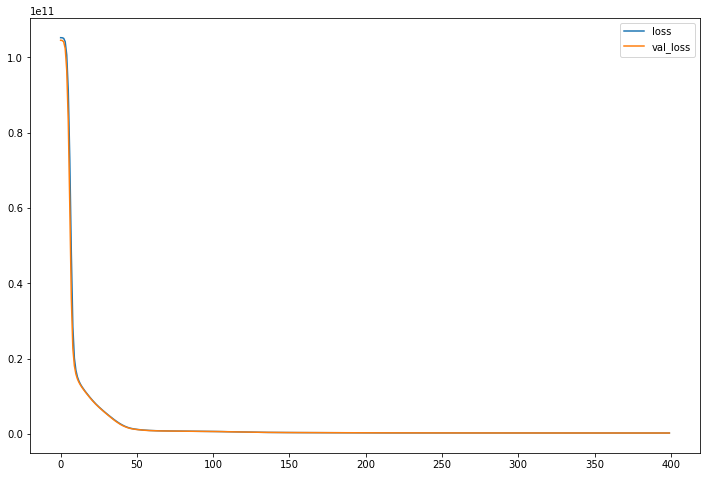

In [195]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [214]:
#evaluate the performance
Keras_Pred = model.predict(Features_test)

print('MAE:', metrics.mean_absolute_error(Prediction_test, Keras_Pred))  
print('MSE:', metrics.mean_squared_error(Prediction_test, Keras_Pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(Prediction_test, Keras_Pred)))
print('VarScore:',metrics.explained_variance_score(Prediction_test, Keras_Pred))

C:\Users\ishak\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


MAE: 12319.735134916467
MSE: 268679808.96237075
RMSE: 16391.45536437722
VarScore: 0.9919708645443567


C:\Users\ishak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

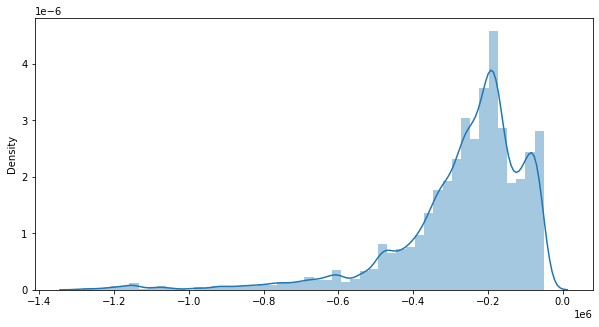

In [216]:
fig = matplotlib.pyplot.figure(figsize=(10,5))
residuals = (Features_test- Keras_Pred)
sns.distplot(residuals)

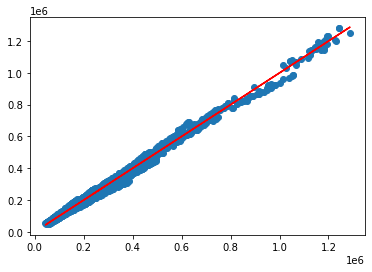

In [220]:
# Prediction vs the Perfect prediction
matplotlib.pyplot.scatter(Prediction_test, Keras_Pred)
matplotlib.pyplot.plot(Prediction_test,Prediction_test,'r')